In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Mutual Information For Regression

In [2]:
df=pd.read_csv('./dataset/Car Price.csv')

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
#We Are Taking Only Numerical Feature

In [6]:
num_df=df.select_dtypes(['int64','float64'])

In [7]:
num_df.drop('car_ID',axis=1,inplace=True)
num_df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
#Seperating The Depedant and Indepedant Feature
X=num_df.drop('price',axis=1)
y=num_df['price']

In [9]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print('Shape of X_train',X_train.shape,
      '\nShape of X_test',X_test.shape)

Shape of X_train (164, 14) 
Shape of X_test (41, 14)


In [10]:
#feature Selection Using Mutual Info Regression
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(X_train,y_train)

In [11]:
mutual_info

array([0.17704361, 0.52360861, 0.49575746, 0.66621601, 0.31083818,
       0.85748142, 0.79996757, 0.41516559, 0.28876434, 0.14477288,
       0.83583557, 0.15525906, 0.70543289, 0.89732949])

In [12]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns

In [13]:
#Sorting Columns As Per Values
mutual_info.sort_values(ascending=False)

highwaympg          0.897329
curbweight          0.857481
horsepower          0.835836
enginesize          0.799968
citympg             0.705433
carwidth            0.666216
wheelbase           0.523609
carlength           0.495757
boreratio           0.415166
carheight           0.310838
stroke              0.288764
symboling           0.177044
peakrpm             0.155259
compressionratio    0.144773
dtype: float64

<AxesSubplot: >

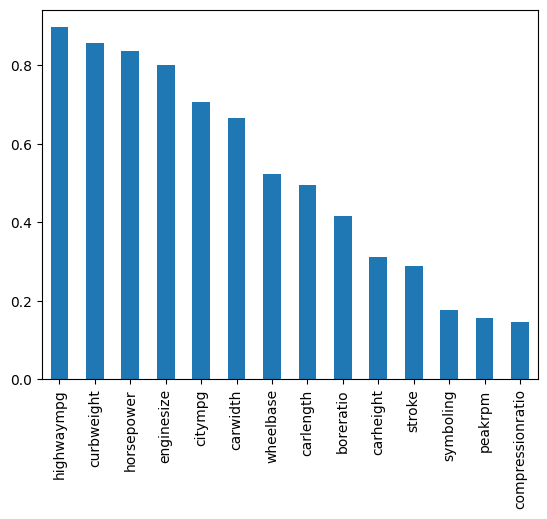

In [14]:

mutual_info.sort_values(ascending=False).plot(kind='bar')

In [19]:
#Selecting Top 30 Percentile Values using Selectpercentile method
from sklearn.feature_selection import SelectPercentile
percentile=SelectPercentile(mutual_info_regression,percentile=30)
percentile.fit(X_train,y_train)

SelectPercentile(percentile=30,
                 score_func=<function mutual_info_regression at 0x000002AFE8EC0AE0>)

In [20]:
percentile.get_support()

array([False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False,  True])

In [21]:
X_train.columns[percentile.get_support()]

Index(['curbweight', 'enginesize', 'horsepower', 'highwaympg'], dtype='object')

Above are the top 30 Percentile depedant feature

In [22]:
#Using Selectbest method
from sklearn.feature_selection import SelectKBest
best5=SelectKBest(mutual_info_regression,k=5)
best5.fit(X_train,y_train)

SelectKBest(k=5,
            score_func=<function mutual_info_regression at 0x000002AFE8EC0AE0>)

In [23]:
X_train.columns[best5.get_support()]

Index(['curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg'], dtype='object')

## Mutual Information For Classification

In [ ]:
#importing the wine dataset
df=pd.read_csv('./dataset/wine-class.csv')


In [ ]:
df

In [ ]:
df.info()

In [ ]:
#Seperate The Depedant and Indepedant feature
X=df.drop('class',axis=1)
y=df['class']

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print('Shape of X_train',X_train.shape,
      '\nShape of X_test',X_test.shape)

In [ ]:
#feature Selection Using Mutual Info Classification
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X_train,y_train)

In [ ]:
mutual_info

We have got 13 feature 

In [ ]:
#converting into series
mutual_info=pd.Series(mutual_info)
#assigning the column names
mutual_info.index=X_train.columns

In [ ]:
#Sorting The Values AS Per Importance
mutual_info.sort_values(ascending=False)

In [ ]:
mutual_info.sort_values(ascending=False).plot(kind='bar')

In [ ]:
#From The Above 13 Features We will Select Best 7 Features
from sklearn.feature_selection import SelectKBest
best7=SelectKBest(mutual_info_classif,k=7)
best7.fit(X_train,y_train)

In [ ]:
best7.get_support()

In [ ]:
#To Convert True False Into The Column Names
X_train.columns[best7.get_support()]

These are top 7 feature, and we can use it for the model training